<a href="https://colab.research.google.com/github/Ashubapun/Customer-Churn-Prediction/blob/main/Customer_Churn_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [164]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px

In [165]:
df = pd.read_csv('/content/Churn_Modelling (1).csv')
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [166]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [167]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [168]:
df.drop(columns = ['RowNumber',	'CustomerId',	'Surname'], inplace = True)

In [169]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [170]:
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [171]:
df['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [172]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

<Axes: xlabel='Exited', ylabel='count'>

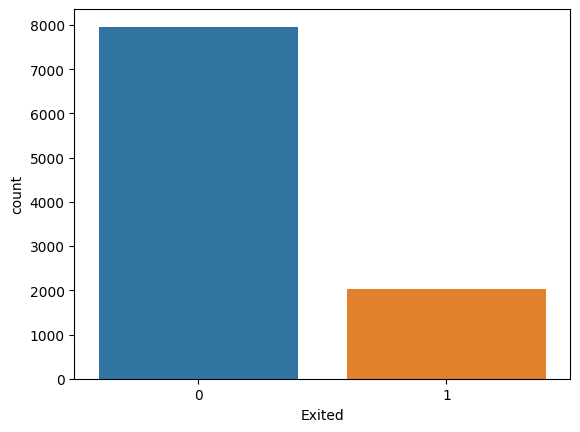

In [173]:
sns.countplot(data = df, x = df['Exited'])

In [174]:
df = pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True)

In [175]:
df.shape

(10000, 12)

In [176]:
df_x = df.drop(columns = 'Exited')
df_y = df['Exited']

In [177]:
df_x.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [178]:
df_x.shape

(10000, 11)

# Handling Imbalanced Data

In [179]:
# from imblearn.combine import SMOTETomek
# # Implementing Oversampling for Handling Imbalanced 
# smt = SMOTETomek(random_state=42)
# x, y = smt.fit_resample(df_x,df_y)

In [180]:
## RandomOverSampler to handle imbalanced data
from imblearn.over_sampling import RandomOverSampler
ros =  RandomOverSampler(sampling_strategy = 1.0)
X_train_res, Y_train_res = ros.fit_resample(df_x, df_y)

In [181]:
X_train_res

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
15921,641,33,2,146193.60,2,1,1,55796.83,0,0,1
15922,718,41,1,0.00,2,0,1,27509.52,0,0,0
15923,590,37,0,64345.21,1,0,1,61759.33,0,1,0
15924,608,41,3,89763.84,1,0,0,199304.74,0,1,0


In [182]:
Y_train_res

0        1
1        0
2        1
3        0
4        0
        ..
15921    1
15922    1
15923    1
15924    1
15925    1
Name: Exited, Length: 15926, dtype: int64

**Test train split**

In [183]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_train_res, Y_train_res, random_state = 1, test_size = 0.25)

In [184]:
x_train.shape, y_train.shape

((11944, 11), (11944,))

In [185]:
x_test.shape, y_test.shape

((3982, 11), (3982,))

**Scaling the x_train and x_test**

In [186]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [187]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential 
from tensorflow.keras.layers import Dense

In [188]:
model = Sequential()
model.add(Dense(11,activation='relu',input_dim=11))
model.add(Dense(1,activation='sigmoid'))

In [189]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 11)                132       
                                                                 
 dense_10 (Dense)            (None, 1)                 12        
                                                                 
Total params: 144
Trainable params: 144
Non-trainable params: 0
_________________________________________________________________


In [190]:
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

In [197]:
history = model.fit(x_train,y_train,batch_size=50,epochs=50, verbose=1,validation_split=0.2)

Epoch 1/50
192/192 [==============================] - 1s 7ms/step - loss: 0.5241 - accuracy: 0.7401 - val_loss: 0.5227 - val_accuracy: 0.7501
Epoch 2/50
192/192 [==============================] - 1s 7ms/step - loss: 0.5123 - accuracy: 0.7481 - val_loss: 0.5077 - val_accuracy: 0.7522
Epoch 3/50
192/192 [==============================] - 1s 6ms/step - loss: 0.5014 - accuracy: 0.7546 - val_loss: 0.4956 - val_accuracy: 0.7656
Epoch 4/50
192/192 [==============================] - 2s 10ms/step - loss: 0.4929 - accuracy: 0.7542 - val_loss: 0.4875 - val_accuracy: 0.7677
Epoch 5/50
192/192 [==============================] - 2s 12ms/step - loss: 0.4864 - accuracy: 0.7588 - val_loss: 0.4810 - val_accuracy: 0.7731
Epoch 6/50
192/192 [==============================] - 1s 6ms/step - loss: 0.4815 - accuracy: 0.7609 - val_loss: 0.4757 - val_accuracy: 0.7744
Epoch 7/50
192/192 [==============================] - 1s 7ms/step - loss: 0.4776 - accuracy: 0.7637 - val_loss: 0.4714 - val_accuracy: 0.7727
Epoc

In [198]:
model.layers[0].get_weights()

[array([[ 0.12519945,  0.15218247,  0.1604561 , -0.14930893,  0.22961687,
         -0.18438703, -0.10571232,  0.4534762 , -0.43474677,  0.5255669 ,
          0.04999818],
        [-0.7488295 ,  0.8312884 , -0.00880423, -0.56806463, -0.10828977,
         -0.47928745, -0.8342141 , -0.01550424,  0.50872785, -0.59651726,
         -0.21209015],
        [ 0.0895956 ,  0.30848798,  0.32434   , -0.27959728,  0.05990913,
          0.21891181, -0.19876185, -0.07235117, -0.35740623, -0.33333004,
         -0.4124425 ],
        [-0.17136782, -0.21321559, -0.02325908, -0.3406117 ,  0.11676418,
         -0.33611292,  0.02527318, -0.12605362,  0.64607006, -0.36131102,
         -0.92130077],
        [-0.3355416 ,  0.33806244, -1.5488929 ,  0.07655904,  1.5553277 ,
          0.00864064,  0.03300606, -0.07123827,  1.142593  ,  0.08397532,
         -1.4402335 ],
        [ 0.12647396,  0.2208817 , -0.04755678, -0.43401036, -0.12510814,
          0.13365915, -0.00445762,  0.1546055 ,  0.07370444, -0.3775298

In [199]:
model.layers[1].get_weights()

[array([[-0.6129289 ],
        [-0.58053404],
        [ 0.89588517],
        [-0.29222795],
        [ 1.5285834 ],
        [-0.57932454],
        [-0.73261994],
        [-0.15223847],
        [ 0.65446866],
        [-0.45586577],
        [ 1.0370307 ]], dtype=float32),
 array([0.10049492], dtype=float32)]

In [200]:
y_pred = model.predict(x_test)
y_pred

125/125 [==============================] - 0s 2ms/step


array([[0.26406324],
       [0.83380425],
       [0.9519859 ],
       ...,
       [0.05245766],
       [0.32127202],
       [0.01109781]], dtype=float32)

In [201]:
# y_pred = y_pred.argmax(axis=-1)
y_pred = np.where(y_pred>0.5, 1, 0)

In [202]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7712204922149674

In [210]:
model = Sequential()
model.add(Dense(11,activation='relu',input_dim=11))
model.add(Dense(11, activation = 'relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])
history = model.fit(x_train,y_train,batch_size=50,epochs=100, verbose=1,validation_split=0.2)
y_pred1 = model.predict(x_test)
y_pred1

Epoch 1/100
192/192 [==============================] - 2s 4ms/step - loss: 0.6806 - accuracy: 0.5861 - val_loss: 0.6245 - val_accuracy: 0.6547
Epoch 2/100
192/192 [==============================] - 1s 5ms/step - loss: 0.6020 - accuracy: 0.6851 - val_loss: 0.5829 - val_accuracy: 0.6961
Epoch 3/100
192/192 [==============================] - 1s 5ms/step - loss: 0.5707 - accuracy: 0.7076 - val_loss: 0.5638 - val_accuracy: 0.7103
Epoch 4/100
192/192 [==============================] - 1s 5ms/step - loss: 0.5555 - accuracy: 0.7196 - val_loss: 0.5493 - val_accuracy: 0.7258
Epoch 5/100
192/192 [==============================] - 1s 3ms/step - loss: 0.5429 - accuracy: 0.7282 - val_loss: 0.5358 - val_accuracy: 0.7321
Epoch 6/100
192/192 [==============================] - 0s 3ms/step - loss: 0.5250 - accuracy: 0.7380 - val_loss: 0.5129 - val_accuracy: 0.7547
Epoch 7/100
192/192 [==============================] - 1s 3ms/step - loss: 0.5023 - accuracy: 0.7545 - val_loss: 0.4894 - val_accuracy: 0.7668

array([[0.24417463],
       [0.9489436 ],
       [0.9898557 ],
       ...,
       [0.02146873],
       [0.19058378],
       [0.15915035]], dtype=float32)

In [211]:
y_pred1 = np.where(y_pred1>0.5, 1, 0)
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred1)

0.7780010045203415